In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/README.md.txt
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-173.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-334.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-309.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-487.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-178.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-10.png
/kaggle/input/tuberculos

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam

In [3]:
def binclass(folder,target):
    images=[]
    for filename in os.listdir(folder):
        img=cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append([img,target])
    return images

In [4]:
normal=binclass("../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal/",0)

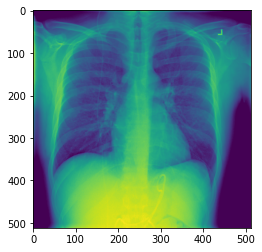

In [5]:
plt.imshow(normal[0][0])

In [7]:
abnormal = binclass("../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/",1)

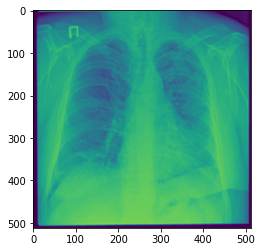

In [8]:
plt.imshow(abnormal[0][0])

In [11]:
normal.extend(abnormal)
total=normal

In [12]:
feature_mat=[]
target=[]
for a,b in total:
    feature_mat.append(a)
    target.append(b)

In [ ]:
#print(feature_mat)

0


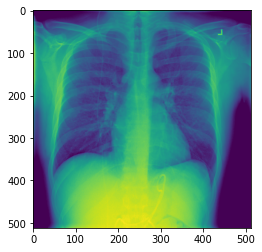

In [13]:
plt.imshow(feature_mat[0])
print(target[0])

1


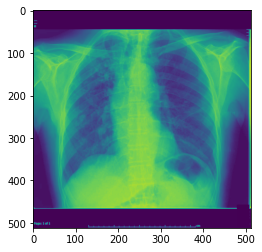

In [14]:
plt.imshow(feature_mat[4000])
print(target[4000])

In [15]:
x=[]
img_size=250
for a in feature_mat:
    arr=cv2.resize(a,(img_size,img_size))
    x.append(arr)

0


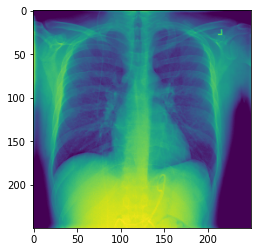

In [16]:
plt.imshow(x[0])
print(target[0])

In [17]:
norm_x=[]
for a in x:
    tmp=a/255
    norm_x.append(tmp)

0


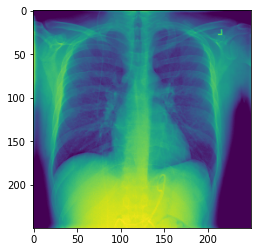

In [18]:
plt.imshow(norm_x[0])
print(target[0])

In [20]:
x_train,x_test,y_train,y_test = train_test_split(norm_x,target)

In [21]:
print(np.array(x_train).shape)
print(np.array(x_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(3675, 250, 250)
(1225, 250, 250)
(3675,)
(1225,)


In [22]:
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]
print(img_rows)
print(img_cols)

250
250


In [23]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [24]:
X_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
X_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [25]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(3675, 250, 250, 1)
(1225, 250, 250, 1)
(3675,)
(1225,)


In [26]:
def def_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(250, 250,1)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dense(2, activation='softmax'))
    # compile model
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
model =  def_model()
history = model.fit(np.array(X_train),np.array(y_train), epochs=40,validation_data=(X_test, np.array(y_test)))

Epoch 1/40
115/115 [==============================] - 13s 44ms/step - loss: 1.3245 - accuracy: 0.7826 - val_loss: 0.1806 - val_accuracy: 0.9437
Epoch 2/40
115/115 [==============================] - 4s 35ms/step - loss: 0.1363 - accuracy: 0.9513 - val_loss: 0.1059 - val_accuracy: 0.9576
Epoch 3/40
115/115 [==============================] - 4s 35ms/step - loss: 0.0714 - accuracy: 0.9726 - val_loss: 0.0592 - val_accuracy: 0.9780
Epoch 4/40
115/115 [==============================] - 4s 35ms/step - loss: 0.0421 - accuracy: 0.9863 - val_loss: 0.0995 - val_accuracy: 0.9682
Epoch 5/40
115/115 [==============================] - 4s 35ms/step - loss: 0.0508 - accuracy: 0.9811 - val_loss: 0.0680 - val_accuracy: 0.9853
Epoch 6/40
115/115 [==============================] - 4s 35ms/step - loss: 0.0363 - accuracy: 0.9877 - val_loss: 0.0909 - val_accuracy: 0.9812
Epoch 7/40
115/115 [==============================] - 4s 35ms/step - loss: 0.0293 - accuracy: 0.9917 - val_loss: 0.0559 - val_accuracy: 0.989

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


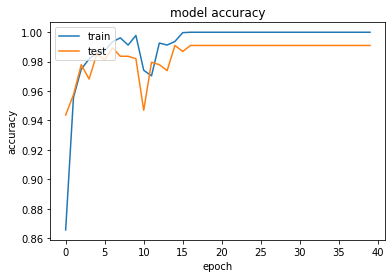

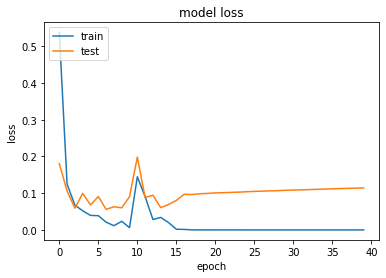

In [28]:
print(history.history.keys())
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
a=np.array(X_test)
a[0,2,1]

array([0.88235294])

In [30]:
predicted = model.predict(a)

In [31]:
predicted

array([[1.0000000e+00, 0.0000000e+00],
       [7.8881190e-14, 1.0000000e+00],
       [1.0000000e+00, 2.6475343e-23],
       ...,
       [1.0000000e+00, 5.0546221e-17],
       [3.8697201e-18, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [32]:
result = []
for item in predicted:
    result.append(np.argmax(item))

In [33]:
print(result)

[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 

In [35]:
df = pd.DataFrame(list(zip(y_test, result)),columns =['Actual', 'Predicted'])

In [36]:
df

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1220,0,0
1221,1,1
1222,0,0
1223,1,1


In [37]:
df.iloc[3]

Actual       0
Predicted    0
Name: 3, dtype: int64

<AxesSubplot:>

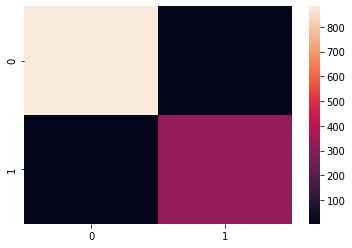

In [38]:
sns.heatmap(confusion_matrix(result,y_test))

In [39]:
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as imgen
from keras.models import Model, load_model
from keras.layers import Dropout, Dense, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, CSVLogger
from keras.optimizers import Adam

from keras.applications.resnet_v2 import ResNet50V2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.metrics import classification_report, confusion_matrix

In [40]:

base_model = ResNet50V2(include_top = False,
                       weights = "imagenet",
                       pooling = "avg")

base_model.trainable = False

94674944/94668760 [==============================] - 1s 0us/step


In [41]:
image_input = Input(shape = (224, 224, 3))
x = base_model(image_input, training = False)
x = Dense(256, activation = "relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation = "relu")(x)
image_output = Dense(1, activation = "sigmoid")(x)

model = Model(image_input, image_output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 24,122,369
Trainable params: 557,569
Non-trainable params: 23,564,800
___________________________________________

In [42]:
#complier
METRICS = ["accuracy", tf.keras.metrics.AUC(name = "AUC")]

model.compile(optimizer = Adam(), loss = "binary_crossentropy",
              metrics = METRICS
             )

In [43]:
#model.evaluate(x_test)